In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
df = pd.read_csv('2004-2020_full.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           3290 non-null   object 
 1   chichonangluong                3290 non-null   float64
 2   chitiendien                    3290 non-null   float64
 3   thunhap                        3290 non-null   float64
 4   chitieu                        3290 non-null   float64
 5   month                          3290 non-null   int64  
 6   Gia xang (Dollars per Gallon)  3290 non-null   float64
 7   Gia Dau (Dollars per Barrel)   3290 non-null   float64
 8   Gia Gas Propane (USD/gallon)   3290 non-null   float64
 9   Gia dien (Uscent/Kwh)          3290 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 257.2+ KB


In [9]:
df.drop(['date','month'],axis=1)

,chichonangluong,chitiendien,thunhap,chitieu,Gia xang (Dollars per Gallon),Gia Dau (Dollars per Barrel),Gia Gas Propane (USD/gallon),Gia dien (Uscent/Kwh)
0,4777.05,1504.31,117128.84,111438.48,0.945,32.51,0.659,2.12
1,4504.85,1963.45,125003.85,102205.23,0.945,32.51,0.659,2.12
2,3931.06,1547.72,118254.58,100961.83,0.945,32.51,0.659,2.12
3,4051.67,1709.00,128015.04,101098.27,0.945,32.51,0.659,2.12
4,4048.26,1647.26,116688.95,128757.86,0.960,33.71,0.694,2.12
...,...,...,...,...,...,...,...,...
3285,21711.41,6487.69,887982.97,121006.38,1.413,47.94,0.704,8.43
3286,30605.86,8554.56,960405.52,97222.29,1.396,48.18,0.718,8.43
3287,22801.83,7068.79,792227.16,89361.89,1.417,47.50,0.728,8.43
3288,24533.63,8792.15,956347.11,102756.99,1.438,47.85,0.753,8.43


In [17]:
df

,date,chichonangluong,chitiendien,thunhap,chitieu,month,Gia xang (Dollars per Gallon),Gia Dau (Dollars per Barrel),Gia Gas Propane (USD/gallon),Gia dien (Uscent/Kwh)
0,1/1/2004,4777.05,1504.31,117128.84,111438.48,1,0.945,32.51,0.659,2.12
1,1/2/2004,4504.85,1963.45,125003.85,102205.23,1,0.945,32.51,0.659,2.12
2,1/3/2004,3931.06,1547.72,118254.58,100961.83,1,0.945,32.51,0.659,2.12
3,1/4/2004,4051.67,1709.00,128015.04,101098.27,1,0.945,32.51,0.659,2.12
4,1/5/2004,4048.26,1647.26,116688.95,128757.86,1,0.960,33.71,0.694,2.12
...,...,...,...,...,...,...,...,...,...,...
3285,12/27/2020,21711.41,6487.69,887982.97,121006.38,12,1.413,47.94,0.704,8.43
3286,12/28/2020,30605.86,8554.56,960405.52,97222.29,12,1.396,48.18,0.718,8.43
3287,12/29/2020,22801.83,7068.79,792227.16,89361.89,12,1.417,47.50,0.728,8.43
3288,12/30/2020,24533.63,8792.15,956347.11,102756.99,12,1.438,47.85,0.753,8.43


In [21]:
print("\nThống kê mô tả:")
df.describe()


Thống kê mô tả:


,chichonangluong,chitiendien,thunhap,chitieu,month,Gia xang (Dollars per Gallon),Gia Dau (Dollars per Barrel),Gia Gas Propane (USD/gallon),Gia dien (Uscent/Kwh)
count,3290.000000,3290.000000,3.290000e+03,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,12647.598468,6260.082264,4.676267e+05,156258.853787,6.519149,1.956155,69.048255,0.911321,5.829611
std,6769.251110,4622.832445,3.146914e+05,88023.023993,3.450263,0.682336,25.762465,0.344505,2.135793
min,3310.020000,998.990000,8.522833e+04,45252.290000,1.000000,0.434000,-36.980000,0.203000,2.120000
25%,7575.465000,3091.722500,1.919710e+05,93235.322500,4.000000,1.376000,46.222500,0.631250,4.560000
50%,11393.360000,4854.805000,4.154982e+05,125700.710000,7.000000,1.938000,68.045000,0.918000,6.120000
75%,15067.127500,7827.107500,7.429354e+05,188158.985000,10.000000,2.569000,88.772500,1.093750,7.660000
max,40097.020000,31304.770000,1.302510e+06,504887.360000,12.000000,3.665000,145.310000,1.980000,8.430000


In [23]:
variables = ['chichonangluong', 'chitiendien', 'thunhap', 'chitieu',
             'Gia xang (Dollars per Gallon)', 'Gia Dau (Dollars per Barrel)',
             'Gia Gas Propane (USD/gallon)', 'Gia dien (Uscent/Kwh)']

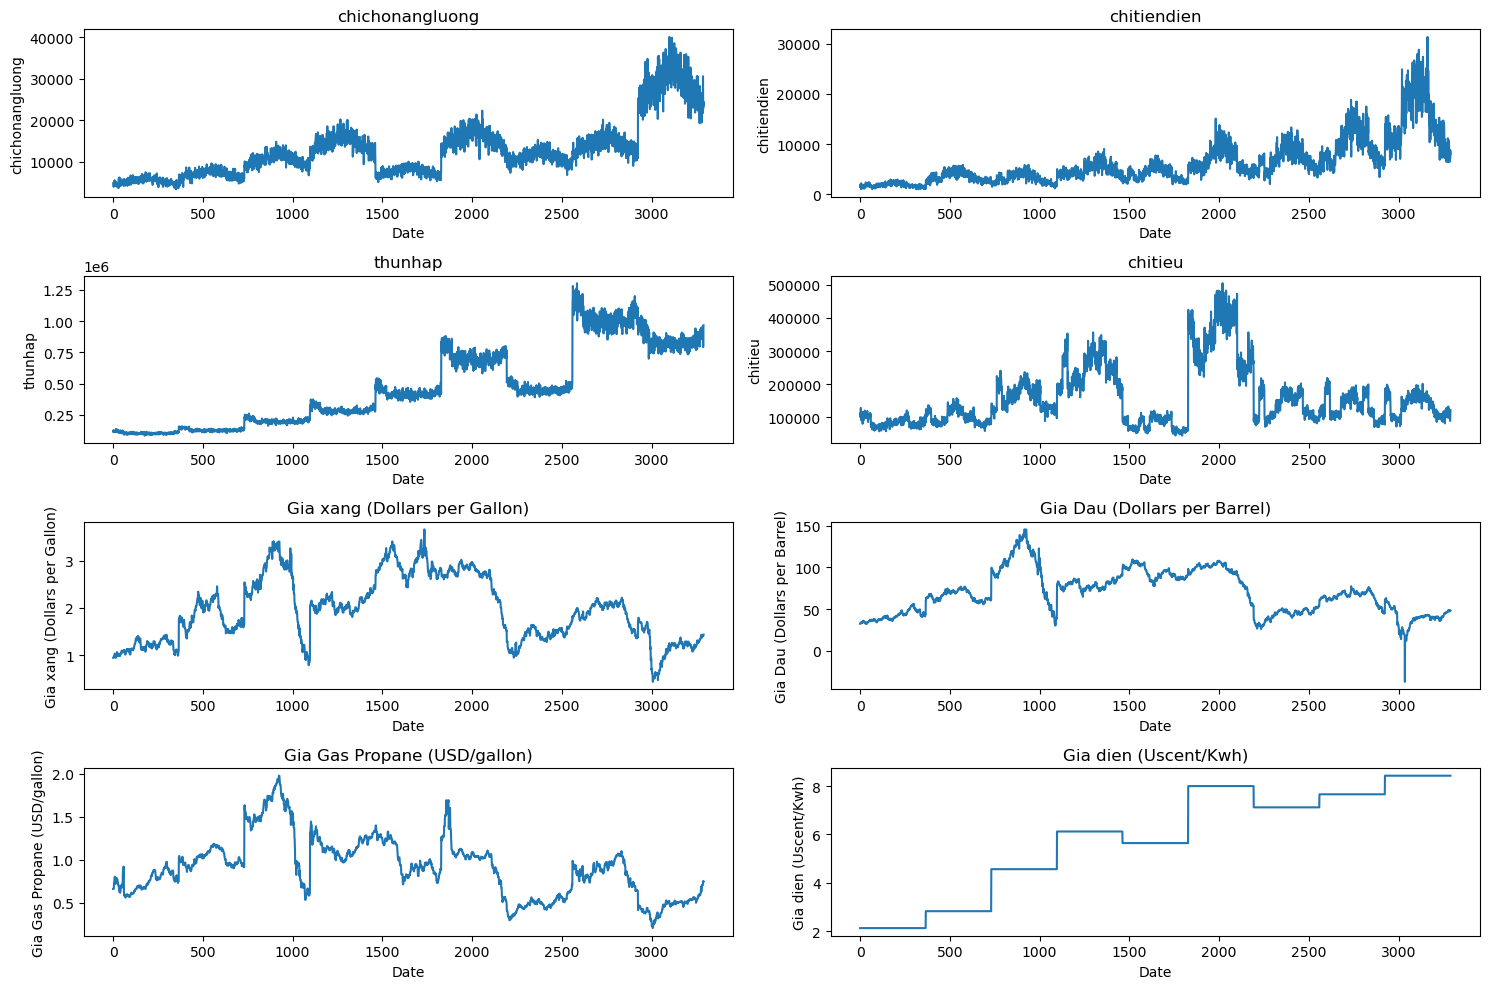

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    plt.plot(df.index, df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

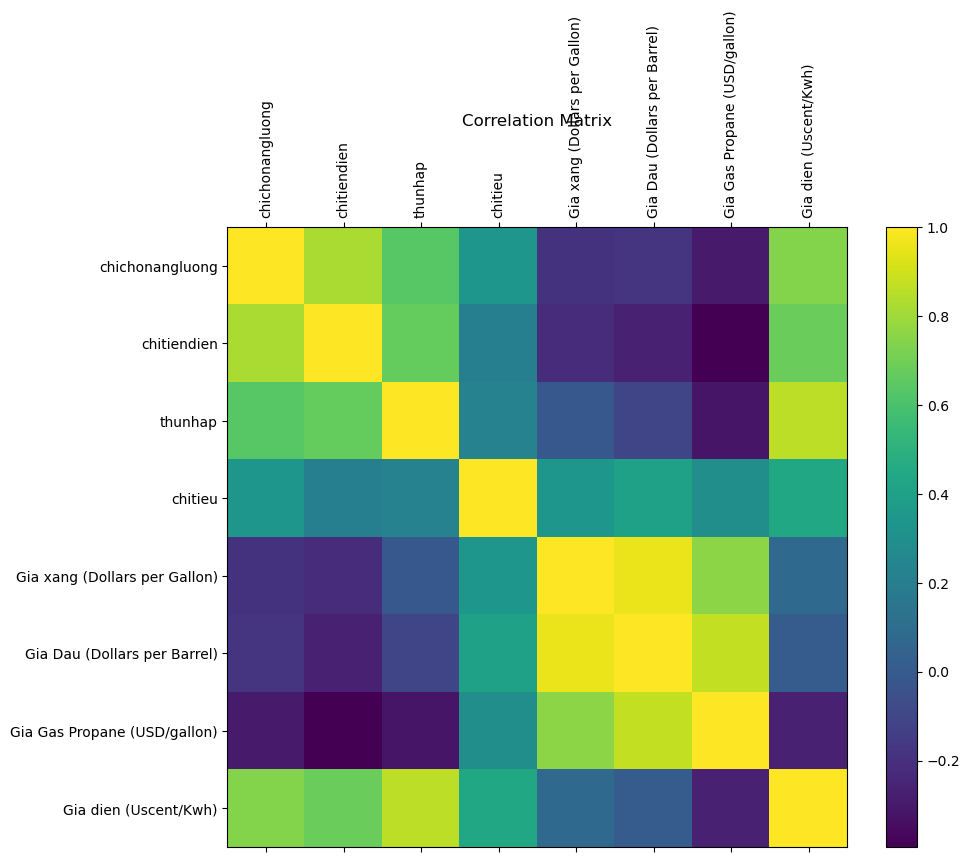

In [31]:
corr = df[variables].corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix", y=1.15)
plt.show()

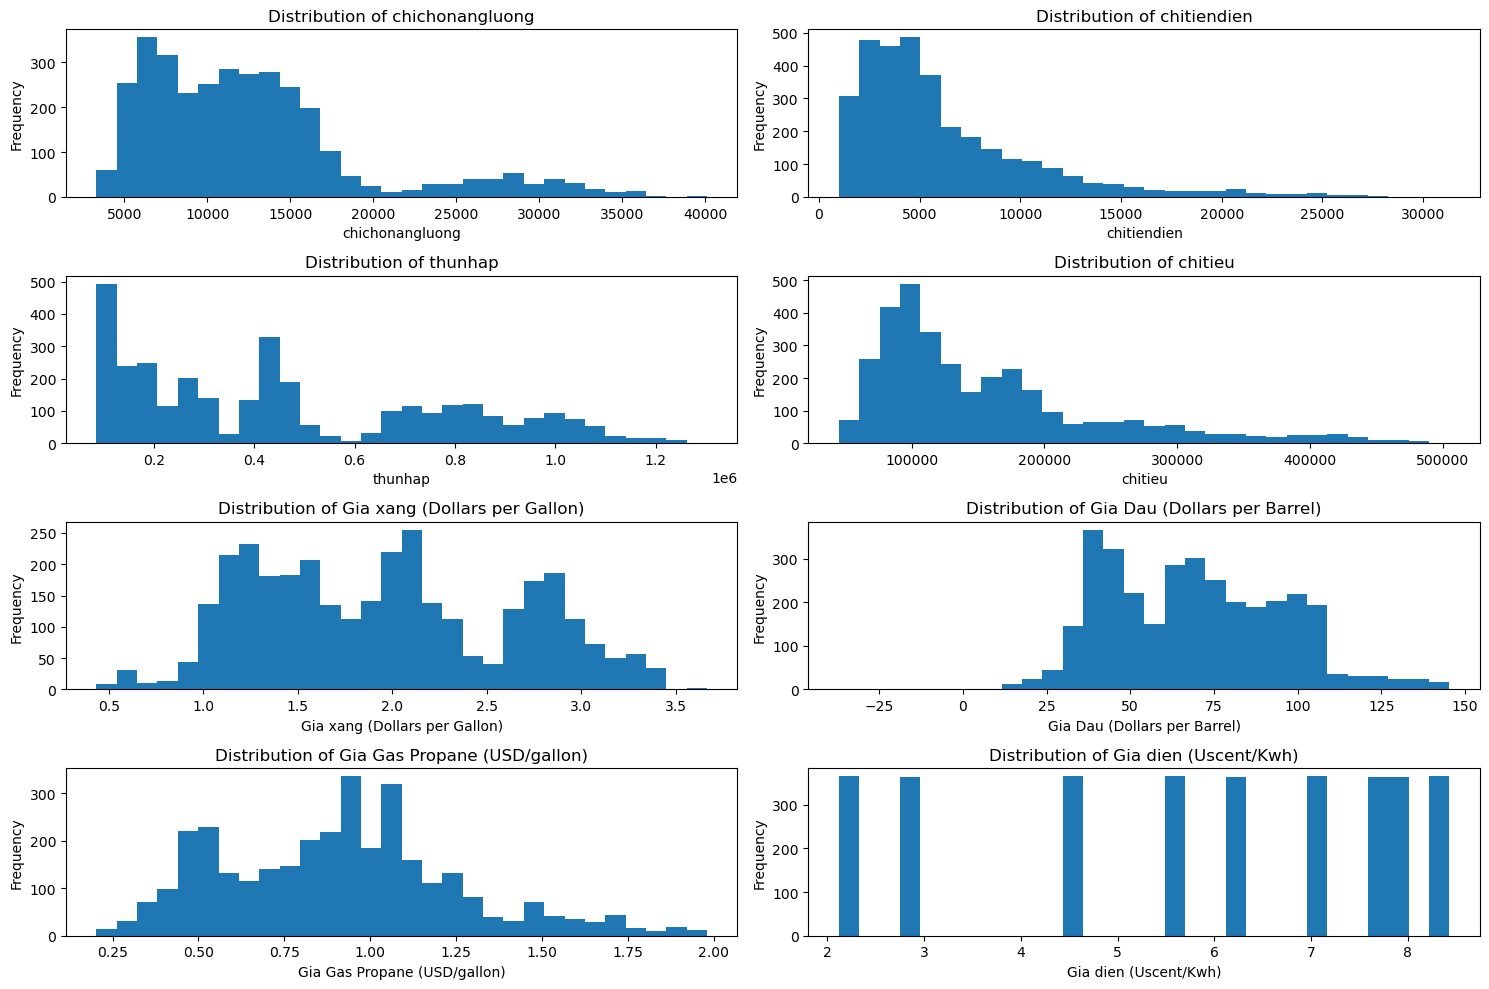

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

In [101]:
# Chuyển đổi cột 'date' sang kiểu datetime, sắp xếp theo ngày và đặt làm index
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3290 entries, 2004-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chichonangluong                3290 non-null   float64
 1   chitiendien                    3290 non-null   float64
 2   thunhap                        3290 non-null   float64
 3   chitieu                        3290 non-null   float64
 4   month                          3290 non-null   int64  
 5   Gia xang (Dollars per Gallon)  3290 non-null   float64
 6   Gia Dau (Dollars per Barrel)   3290 non-null   float64
 7   Gia Gas Propane (USD/gallon)   3290 non-null   float64
 8   Gia dien (Uscent/Kwh)          3290 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 257.0 KB


In [111]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)

# Sử dụng biến 'chichonangluong' làm mục tiêu dự báo (univariate forecast)
data = df['chichonangluong'].values.reshape(-1, 1)

In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Hàm chuyển đổi chuỗi thời gian thành các sequence cho mô hình
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i: i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Chọn kích thước cửa sổ (ví dụ: 30 ngày)
window_size = 7
X, y = create_sequences(data_scaled, window_size)

In [115]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [117]:
model = Sequential()
# Lớp BiLSTM đầu tiên, return_sequences=True để nối với lớp kế tiếp
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(window_size, 1)))
# Lớp BiLSTM thứ hai, trả về vector đặc trưng cuối cùng
model.add(Bidirectional(LSTM(32)))
# Lớp Dense đầu ra, dự báo giá trị chichonangluong tiếp theo
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\84388\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_15                │ (None, 7, 128)         │        33,792 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,073 (293.25 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.1, 
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0077 - val_loss: 0.0012
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

In [121]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Test Loss (MSE): 0.0069755311124026775


In [123]:
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [125]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 2264.0623926821722
Mean Squared Error (MSE): 9439870.515637137
Root Mean Squared Error (RMSE): 3072.437227289947
R2 Score: 0.838159859449873


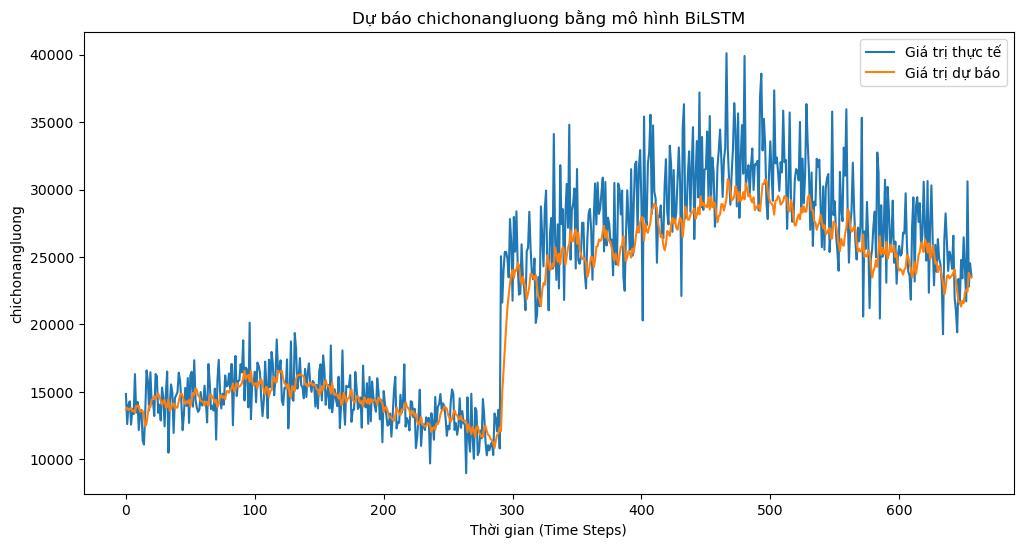

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Giá trị thực tế')
plt.plot(y_pred_inv, label='Giá trị dự báo')
plt.title('Dự báo chichonangluong bằng mô hình BiLSTM')
plt.xlabel('Thời gian (Time Steps)')
plt.ylabel('chichonangluong')
plt.legend()
plt.show()

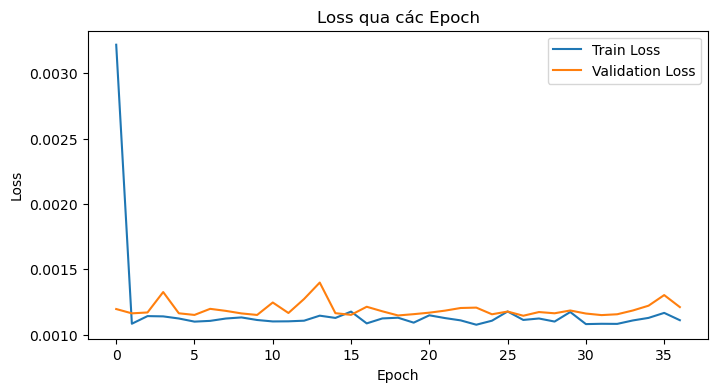

In [129]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()